In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("INF2178_A4_data.csv")
data.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [2]:
def clean_data(df):
    # Drop column: 'Unnamed: 0'
    df = df.drop(columns=['Unnamed: 0'])
    # Drop column: 'Hand'
    df = df.drop(columns=['Hand'])
    # Drop column: 'EDUC'
    df = df.drop(columns=['EDUC'])
    # Drop column: 'SES'
    df = df.drop(columns=['SES'])
    # Drop column: 'CDR'
    df = df.drop(columns=['CDR'])
    # Drop column: 'MMSE'
    df = df.drop(columns=['MMSE'])
    # Drop column: 'eTIV'
    df = df.drop(columns=['eTIV'])
    # Drop column: 'MR Delay'
    df = df.drop(columns=['MR Delay'])
    # Drop rows with missing data across all columns
    df = df.dropna()
    return df

df_clean = clean_data(data.copy())
df_clean.head()

,Subject ID,MRI ID,Group,Visit,M/F,Age,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,M,87,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,M,88,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,M,75,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,M,76,0.713,1.010
4,OAS2_0004,OAS2_0004_MR1,Nondemented,1,F,88,0.710,1.444


In [3]:
# Find the most recent visit for each subject
df_clean = df_clean.loc[df_clean.groupby('Subject ID')['Visit'].idxmax()]
df_clean.head()


,Subject ID,MRI ID,Group,Visit,M/F,Age,nWBV,ASF
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,M,88,0.681,0.876
3,OAS2_0002,OAS2_0002_MR2,Demented,2,M,76,0.713,1.010
5,OAS2_0004,OAS2_0004_MR2,Nondemented,2,F,90,0.718,1.462
7,OAS2_0005,OAS2_0005_MR2,Nondemented,2,M,83,0.711,1.032
8,OAS2_0007,OAS2_0007_MR1,Demented,1,M,71,0.748,1.293


In [4]:
df_clean.describe()

,Visit,Age,nWBV,ASF
count,150.000000,150.000000,150.000000,150.000000
mean,1.960000,77.353333,0.726947,1.199973
std,0.196616,7.531711,0.037613,0.140034
min,1.000000,62.000000,0.646000,0.876000
25%,2.000000,72.000000,0.696500,1.118250
50%,2.000000,78.000000,0.726000,1.190000
75%,2.000000,82.000000,0.751000,1.296000
max,2.000000,98.000000,0.827000,1.587000


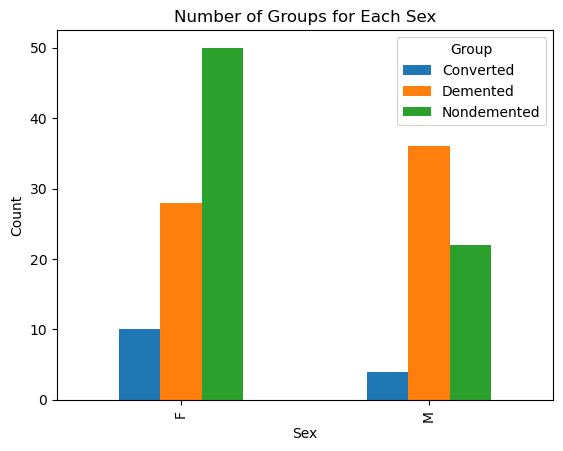

In [5]:
df_clean.groupby('M/F')['Group'].value_counts().unstack().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Groups for Each Sex')
plt.show()


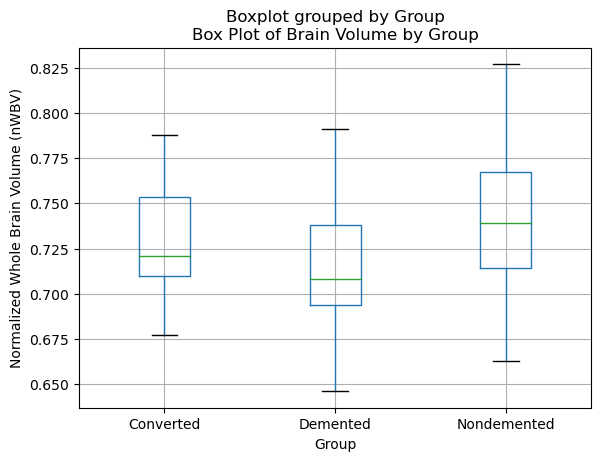

In [6]:
df_clean.boxplot(column='nWBV', by='Group')
plt.xlabel('Group')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')
plt.title('Box Plot of Brain Volume by Group')
plt.show()


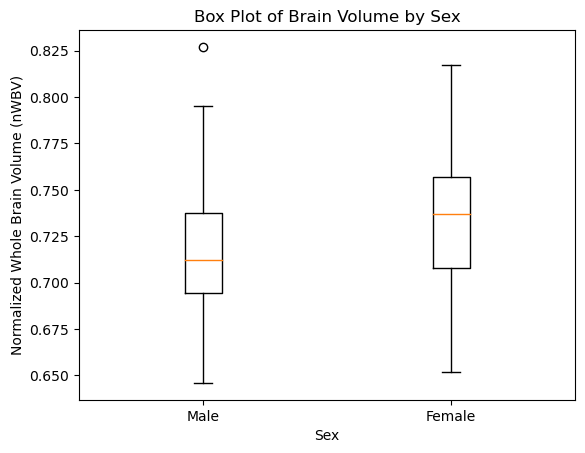

In [7]:
plt.boxplot([df_clean.loc[df_clean['M/F'] == 'M', 'nWBV'], df_clean.loc[df_clean['M/F'] == 'F', 'nWBV']])
plt.xticks([1, 2], ['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')
plt.title('Box Plot of Brain Volume by Sex')
plt.show()


In [8]:
import pingouin as pg

# Perform mixed-effects ANOVA
result = pg.mixed_anova(data=df_clean, dv='nWBV', within='Group', subject='Age', between = 'M/F')

# Print the ANOVA table
print(result)


        Source        SS  DF1  DF2        MS          F     p-unc       np2  \
0          M/F  0.003403    1    4  0.003403   2.161069  0.215492  0.350762   
1        Group  0.003536    2    8  0.001768  10.724270  0.005446  0.728340   
2  Interaction  0.002712    2    8  0.001356   8.225357  0.011460  0.672811   

        eps  
0       NaN  
1  0.842637  
2       NaN  


/Users/anthonyh/miniforge3/envs/cpsc330/lib/python3.10/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.prod(eig) / (eig.sum() / d) ** d


In [9]:
post_hocs = pg.pairwise_ttests(data=df_clean, dv='nWBV', within='Group', subject='Age', between = 'M/F', padjust='fdr_bh')
post_hocs

/Users/anthonyh/miniforge3/envs/cpsc330/lib/python3.10/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/Users/anthonyh/miniforge3/envs/cpsc330/lib/python3.10/site-packages/pingouin/pairwise.py:585: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "Parametric"] = parametric


,Contrast,Group,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Group,-,Converted,Demented,True,True,1.416193,5.000000,two-sided,0.215890,0.215890,fdr_bh,0.753,0.556219
1,Group,-,Converted,Nondemented,True,True,-1.460963,5.000000,two-sided,0.203864,0.215890,fdr_bh,0.781,-0.400989
2,Group,-,Demented,Nondemented,True,True,-3.240688,5.000000,two-sided,0.022932,0.068795,fdr_bh,3.708,-1.335934
3,M/F,-,F,M,False,True,1.560906,2.426409,two-sided,0.237086,NaN,NaN,0.993,1.018486
4,Group * M/F,Converted,F,M,False,True,2.882647,2.846227,two-sided,0.067514,0.188029,fdr_bh,2.081,1.776162
5,Group * M/F,Demented,F,M,False,True,-0.087827,1.599527,two-sided,0.939733,0.939733,fdr_bh,0.579,-0.068606
6,Group * M/F,Nondemented,F,M,False,True,1.939121,3.952711,two-sided,0.125352,0.188029,fdr_bh,1.227,0.982423


In [10]:
#checking assumptions
#mauchly's test of spericity
pg.sphericity(data=df_clean, dv='nWBV', within='Group', subject='Age')[-1]

/Users/anthonyh/miniforge3/envs/cpsc330/lib/python3.10/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.prod(eig) / (eig.sum() / d) ** d


1.0

In [11]:
#test of normality
pg.normality(data=df_clean, dv='nWBV', group='Group')

,W,pval,normal
Group,,,
Nondemented,0.984287,0.509123,True
Demented,0.978652,0.332137,True
Converted,0.947934,0.529122,True


<AxesSubplot: xlabel='Group', ylabel='nWBV'>

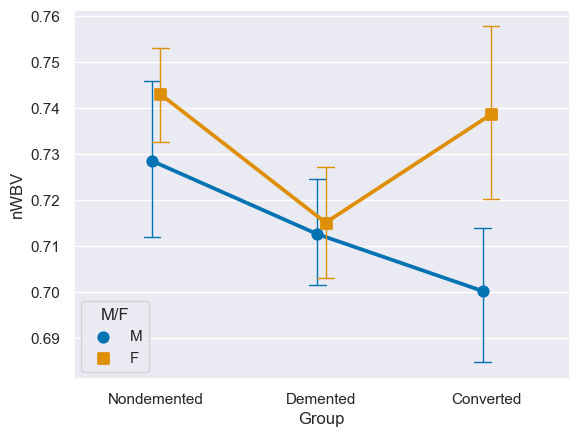

In [12]:
import seaborn as sns
sns.set()
sns.pointplot(data=df_clean, x='Group', y='nWBV', hue='M/F', dodge=True, markers=['o', 's'],
          capsize=.1, errwidth=1, palette='colorblind')


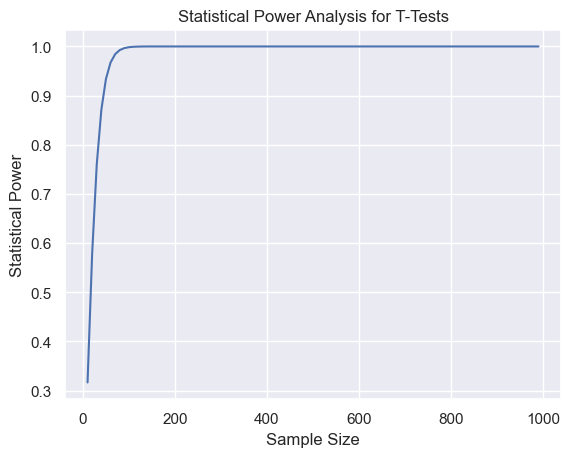

The appropriate sample size for a theoretical experiment with power = 0.91, alpha = 0.05, and effect size = 0.7 is 24.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp

effect_size = 0.7
alpha = 0.05
power = 0.91

# Calculate the sample size
sample_size = smp.tt_solve_power(effect_size=effect_size, alpha=alpha, power=power)

# Create a range of sample sizes
sample_sizes = np.arange(10, 1000, 10)

# Calculate the statistical power for each sample size
statistical_power = smp.tt_ind_solve_power(effect_size=effect_size, nobs1=sample_sizes, alpha=alpha)

# Plot the statistical power as a function of sample size
plt.plot(sample_sizes, statistical_power)
plt.xlabel('Sample Size')
plt.ylabel('Statistical Power')
plt.title('Statistical Power Analysis for T-Tests')
plt.show()

# Print the appropriate sample size
print(f"The appropriate sample size for a theoretical experiment with power = {power}, alpha = {alpha}, and effect size = {effect_size} is {sample_size:.0f}.")
